In [9]:
import pandas as pd
# exibir plotagem na celula do notebook
%matplotlib inline 

In [38]:
#3-hospital; 6-municipio; 7-complexidade; 8-carater de atendimento;12-sub grupo procedimento;14-procedimento
#usecols=[colunax, y,z...] 0> usa colunas especificadas
df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv',sep=';', encoding='cp1252',usecols=[3,6,7,8,12,14])

#alterar o nome das colunas
df.columns=['hospital', 'municipio', 'complexidade', 'carater', 'sub_grupo_procedimento', 'procedimento']

df.head(10)

,hospital,municipio,complexidade,carater,sub_grupo_procedimento,procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
3,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,HERNIOPLASTIA UMBILICAL
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA
5,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SE...
6,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,TRATAMENTO CIRURGICO DE LESOES VASCULARES TRAU...
7,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 04 - Cirurgia das vias aéreas super...,SEPTOPLASTIA PARA CORREÇÃO DE DESVIO
8,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECISTECTOMIA VIDEOLAPAROSCOPICA
9,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS S...


In [11]:
#descrever colunas numéricas
df.describe()

,hospital,municipio,complexidade,carater,sub_grupo_procedimento,procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [12]:
#listar os hospital presentes nos dados, ou seja, selecionar valores unicos das colunas
print(df['hospital'].unique())
print('\n quantidade de hospitais: ', len(df['hospital'].unique()))

['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB'
 '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL'
 '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA' '0010545 HRBZ'
 '0010480 HOSPITAL REGIONAL DE CEILANDIA'
 '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL' '0010472 HRG'
 '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA' '0010529 HRPL'
 '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB'
 '3055450 CBV CENTRO BRASILEIRO DA VISAO'
 '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA' '0010502 HRS'
 '5717515 HRSM' '2645157 HRPA' '0010464 HRAN']

 quantidade de hospitais:  16


In [13]:
#quantidades de linhas pra cada cada valor unico
df['hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [14]:
#quantas cirurgias por sub grupo de procedimento
a = df['sub_grupo_procedimento'].value_counts()
print(a)
nao_cesariano = a[0] - 1060
print('\n quantidade de partos não cesarianos: ', nao_cesariano)

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

<AxesSubplot:>

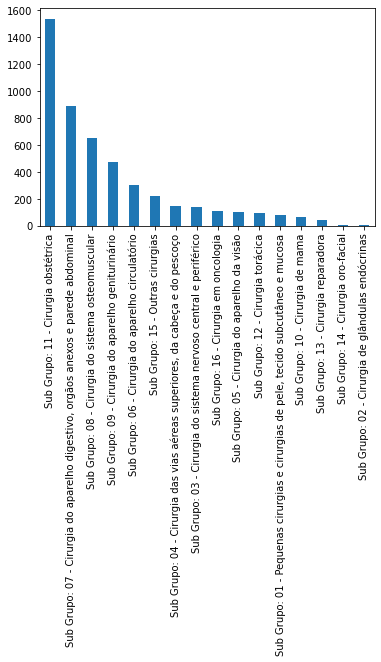

In [15]:
df['sub_grupo_procedimento'].value_counts().plot.bar()

In [16]:
#criar um subconjunto dos dados originais

#trabalhar com apenas um hospital(linha específica de coluna especificada)
#variavel = dataframe[dataframe['coluna desejada'] = 'linha especifica da coluna especificada']
df_hospbase = df[df['hospital'] == '0010472 HRG' ] #seleciona apenas os hospitais que possuem o nome em comparação
df_hospbase.head(10)

,hospital,municipio,complexidade,carater,sub_grupo_procedimento,procedimento
296,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLOSTOMIA
802,0010472 HRG,"GAMA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 16 - Cirurgia em oncologia,COLECTOMIA TOTAL EM ONCOLOGIA
830,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1261,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARI...
1470,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE LUXAÇÃO / FRATURA-LUXA...
1480,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TENOSINOVECTOMIA EM MEMBRO SUPERIOR
1484,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,DEBRIDAMENTO DE ULCERA / DE TECIDOS DESVITALIZ...
1487,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DIAFISARIA DE ...
1527,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,NEURORRAFIA
1529,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE LUXAÇÃO / FRATURA-LUXA...


In [35]:
#subdividir o df em pedaço de palavra
df_hospbase[df_hospbase['procedimento'].str.contains('AMPUTA')]

,hospital,municipio,complexidade,carater,sub_grupo_procedimento,procedimento
1681,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
3367,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
3448,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
3454,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
3685,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE MÃO E PUNHO
3688,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
4428,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
4521,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
4571,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
4809,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO


In [55]:
#.count() -> usado para fazer contagem, repetições
df_hospbase[df_hospbase['procedimento'].str.contains('AMPUTA')].count()

hospital                  11
municipio                 11
complexidade              11
carater                   11
sub_grupo_procedimento    11
procedimento              11
dtype: int64

In [30]:
#quantidade de procedimentos realizado no hospital de base

#value_counts() -> retorna contagem de valores unicos, em ordem decrescente
df_hospbase['procedimento'].value_counts()

PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                           81
SUTURA DE LACERACOES DE TRAJETO PELVICO (NO PARTO ANTES DA ADMISSAO)                55
PARTO CESARIANO                                                                     47
CURETAGEM POS-ABORTAMENTO / PUERPERAL                                               41
APENDICECTOMIA                                                                      26
                                                                                    ..
HERNIOPLASTIA INGUINAL (BILATERAL)                                                   1
TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARIA DA EXTREMIDADE PROXIMAL DO UMERO     1
HISTERECTOMIA SUBTOTAL                                                               1
RECONSTRUCAO LIGAMENTAR INTRA-ARTICULAR DO JOELHO (CRUZADO ANTERIOR)                 1
AMPUTACAO ABDOMINO-PERINEAL DE RETO EM ONCOLOGIA                                     1
Name: procedimento, Length: 109, dtype: int

In [68]:
#dividir o data frame original em linhas especificas de uma coluna especifica -> procedimento que seja parto cesariano
#variavel = dataframe[dataframe['coluna espeficicada'] == 'linha especifica']
df_partoCesariano = df[df['procedimento'] == 'PARTO CESARIANO']
#contagem de valores unicos em cada hospital
df_partoCesariano.value_counts()

#somar os partos cesarianos de todos os hospitais
sum(df_partoCesariano.value_counts())

#soma dos partos cesarianos em hospital específico:
df_partoCesariano['hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010502 HRS                                            92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: hospital, dtype: int64

<AxesSubplot:title={'center':'Partos cesariano por hospital'}>

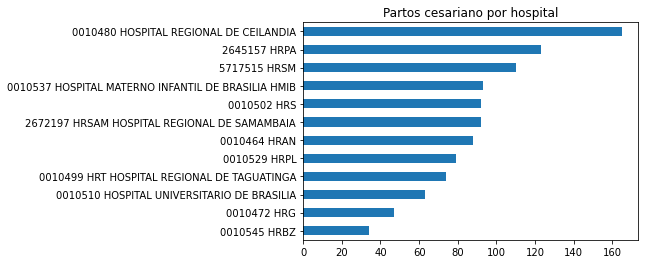

In [74]:
# inveter ordem do grafico e colocar titulo
df_partoCesariano['hospital'].value_counts(ascending = True).plot.barh(title = 'Partos cesariano por hospital')